# HUSKY VERISI ILE EĞITIM YAPILMASI

In [106]:
!nvidia-smi

Wed Jan  4 13:22:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.56       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   44C    P8    30W / 240W |   7074MiB /  8192MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Kutulanmış Lidar Verisinin Okunması

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
def readBinDataset(filename):
    binDataset = np.load(filename, allow_pickle=True)
    #print(bin)

    return binDataset

# Tüm veri setinin okunması aşağıdadır

In [2]:
dataset_path = r"D:\Ara\numpy_dataset_sequences_gazebo"
total_dataset_sz = len(os.listdir(dataset_path)) # bu dizi olarak ayarlanacak
distributed_time = 5
binDataset_ = np.array(np.empty((1,2,3601)))
label_ = np.array(np.empty((1,2)))

In [3]:
binDataset_.shape

(1, 2, 3601)

In [4]:
#windows
infinite_mask = np.array([np.inf]*3601)
dataset2read = 0
seq=1
for sequence in range(100):
    dataset2read += 1
    binDataset_gazebo=readBinDataset(rf"{dataset_path}\{dataset2read}_angleBin.npy")
    binDataset_gazebo_laser = binDataset_gazebo.item().get('lidarDataset')
    binDataset_gazebo_label = binDataset_gazebo.item().get('labelDataset')
    is_corrupted_sequence = np.all(binDataset_gazebo_laser[0] == infinite_mask)
    if(is_corrupted_sequence):
        continue
    binDataset_gazebo_laser=np.array([binDataset_gazebo_laser[:-1],binDataset_gazebo_laser[1:]])
    binDataset_gazebo_laser=np.einsum("ijk->jik",binDataset_gazebo_laser)
    # print(binDataset_gazebo_laser.shape)
    min_len = min(len(binDataset_gazebo_laser), len(binDataset_gazebo_label))
    binDataset_ = np.vstack((binDataset_, binDataset_gazebo_laser[:min_len-min_len%distributed_time]))
    label_ = np.vstack((label_,binDataset_gazebo_label[:min_len-min_len%distributed_time]))
    seq+=1
# linux
#binDataset=readBinDataset("/mnt/d/Ara/numpy_dataset_sequences/%02d_angleBin.npy" % sequence)

In [5]:
len(binDataset_),  binDataset_[1].shape

(37921, (2, 3601))

In [6]:
((len(label_)), binDataset_[0].shape, label_[0].shape)

(37921, (2, 3601), (2,))

In [7]:
binDataset_ = binDataset_[1:]
label_ = label_[1:]

In [8]:
binDataset_.shape, label_.shape

((37920, 2, 3601), (37920, 2))

In [9]:
binDataset_[-1].shape, label_[-1].shape

((2, 3601), (2,))

In [10]:
# for i in range(len(binDataset_)) :
#     binDataset_[i] = binDataset_[i][:binDataset_[i].shape[0]-binDataset_[i].shape[0]%distributed_time]
#     label_[i] = label_[i][:label_[i].shape[0]-label_[i].shape[0]%distributed_time]

In [11]:
# binDataset_[1].shape, label_[1].shape

In [12]:
# binDataset = np.concatenate(binDataset_)
# label = np.concatenate(label_)

# Output Çıktısının(translation, rotation) Kutulanması(Örneklenmesi) İşlemi  

## outlier bulunması

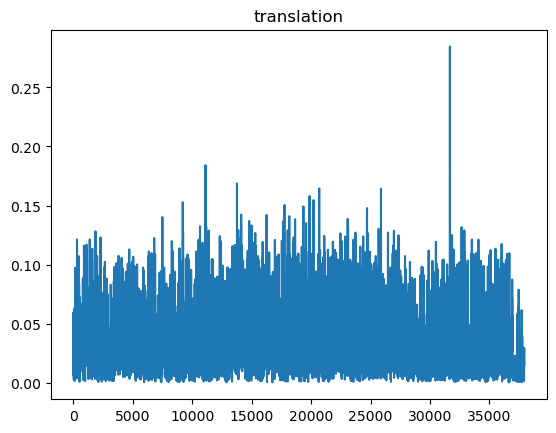

In [13]:
plt.title('translation')
plt.plot(label_[:,0])

(array([1.7747e+04, 1.7268e+04, 2.0990e+03, 6.9000e+02, 1.0500e+02,
        9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.53050869e-04, 2.86034776e-02, 5.70539044e-02, 8.55043312e-02,
        1.13954758e-01, 1.42405185e-01, 1.70855612e-01, 1.99306038e-01,
        2.27756465e-01, 2.56206892e-01, 2.84657319e-01]),
 <BarContainer object of 10 artists>)

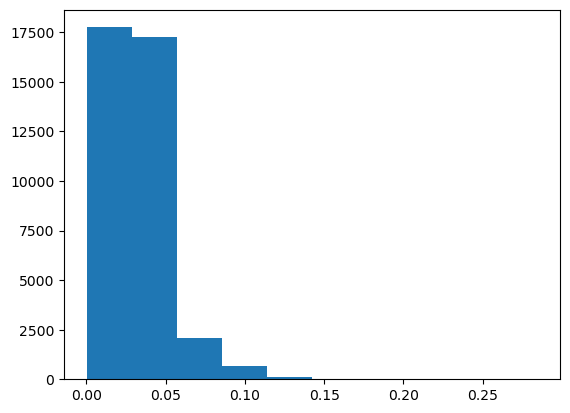

In [14]:
plt.hist(label_[:,0])

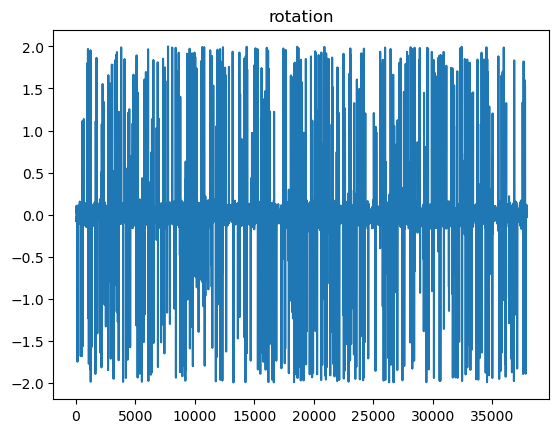

In [15]:
plt.title('rotation')
plt.plot(label_[:,1])

(array([  145.,    41.,    45.,    53., 19789., 17568.,    47.,    42.,
           45.,   145.]),
 array([-1.99643756e+00, -1.59686131e+00, -1.19728506e+00, -7.97708816e-01,
        -3.98132570e-01,  1.44367669e-03,  4.01019923e-01,  8.00596170e-01,
         1.20017242e+00,  1.59974866e+00,  1.99932491e+00]),
 <BarContainer object of 10 artists>)

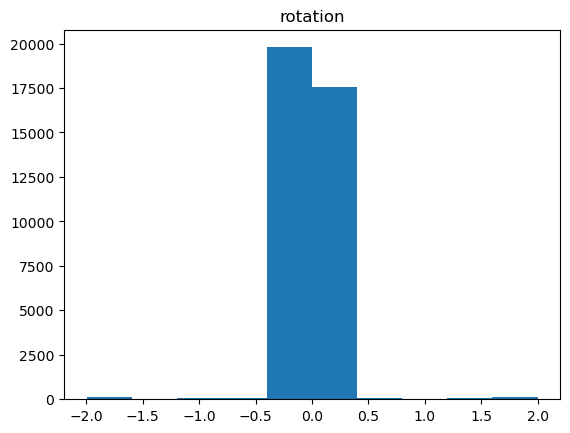

In [16]:
plt.title('rotation')
plt.hist(label_[:,1])

In [17]:
outliers = np.where(label_[:,0] > 0.10)

In [18]:
outliers

(array([  314,   318,   478,   481,   896,   900,  1114,  1384,  1389,
         1407,  1579,  1583,  1596,  1598,  1854,  1870,  2006,  2291,
         2661,  3622,  3810,  4064,  4587,  4707,  4924,  4931,  4970,
         5042,  5368,  6306,  6316,  6356,  6575,  6609,  6804,  6811,
         6881,  7484,  7492,  7494,  8280,  8286,  8288,  8346,  8348,
         8371,  8928,  8933,  9207,  9214,  9235,  9472,  9611,  9662,
         9664,  9684,  9688, 10337, 10342, 10505, 10512, 10532, 10533,
        10626, 10635, 10655, 10659, 10669, 10866, 10869, 10872, 10887,
        10890, 10891, 10973, 11010, 11047, 11051, 11117, 11119, 11121,
        11144, 11178, 11182, 11206, 11348, 11350, 11375, 11390, 11394,
        11651, 11694, 11723, 12320, 12407, 12418, 13367, 13369, 13387,
        13578, 13732, 13768, 13828, 13831, 13837, 13878, 13985, 14120,
        14129, 14146, 14168, 14193, 14278, 14281, 14614, 14616, 14635,
        14636, 14669, 14674, 14746, 14791, 14796, 14829, 14831, 14835,
      

In [43]:
outliers=outliers[0]

In [20]:
truncates = []
for i in range(len(outliers)):
    if (int(outliers[i] / distributed_time) == int(outliers[i-1] / distributed_time)):
        continue
    min_truncate = outliers[i] - outliers[i] % distributed_time
    max_truncate = outliers[i] + (distributed_time - outliers[i] % distributed_time)
    truncates.append(np.s_[min_truncate:max_truncate])



In [21]:
all_truncates = np.r_[tuple(truncates)]
label_=np.delete(label_,all_truncates,axis=0 )
binDataset_=np.delete(binDataset_,all_truncates,axis=0 )

In [22]:
# label=np.delete(label,np.s_[min_truncate[0]:max_truncate[0]],axis=0 )
# binDataset=np.delete(binDataset,np.s_[min_truncate[0]:max_truncate[0]],axis=0 )

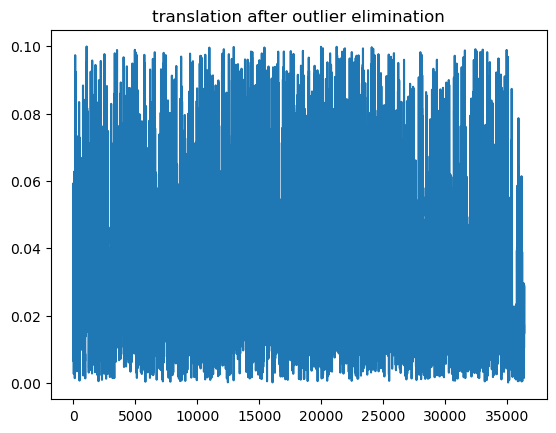

In [23]:
plt.title('translation after outlier elimination')
plt.plot(label_[:,0])

(array([3483., 6917., 8675., 7976., 5618., 1876.,  749.,  447.,  372.,
         247.]),
 array([0.00015305, 0.01013135, 0.02010965, 0.03008795, 0.04006625,
        0.05004455, 0.06002285, 0.07000115, 0.07997946, 0.08995776,
        0.09993606]),
 <BarContainer object of 10 artists>)

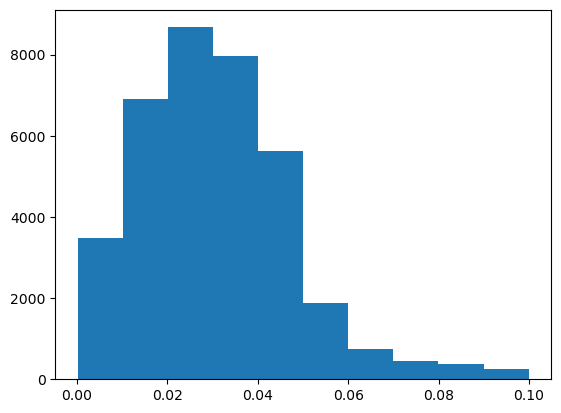

In [24]:
plt.hist(label_[:,0])

## Rotasyon için eliminasyon

In [25]:
np.min(label_[:,1])

-1.996437556192799

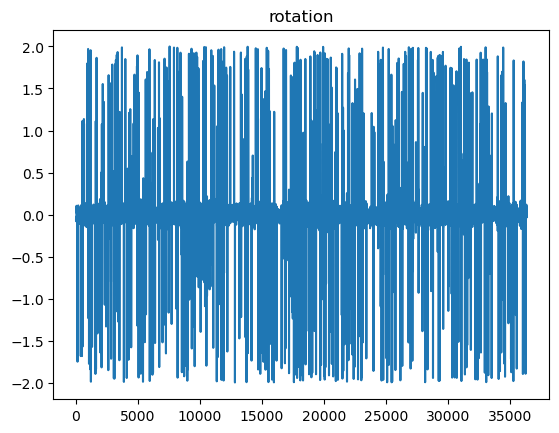

In [26]:
plt.title('rotation')
plt.plot(label_[:,1])

(array([  144.,    40.,    44.,    50., 18968., 16838.,    47.,    41.,
           44.,   144.]),
 array([-1.99643756e+00, -1.59686131e+00, -1.19728506e+00, -7.97708816e-01,
        -3.98132570e-01,  1.44367669e-03,  4.01019923e-01,  8.00596170e-01,
         1.20017242e+00,  1.59974866e+00,  1.99932491e+00]),
 <BarContainer object of 10 artists>)

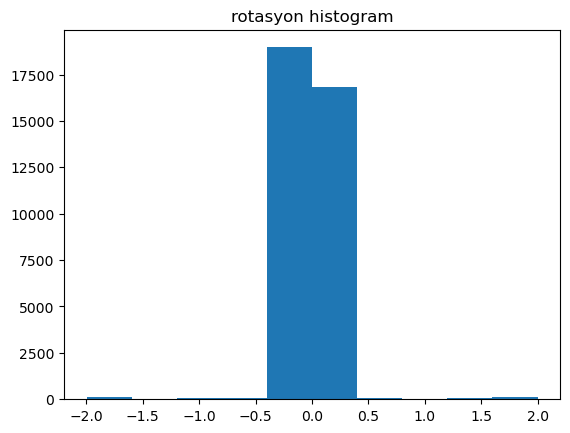

In [27]:
plt.title('rotasyon histogram')
plt.hist(label_[:,1])

In [28]:
outliers = np.where((label_[:,1] < -0.2) | (label_[:,1] > 0.2))

In [29]:
len(outliers[0])

642

In [30]:
outliers=outliers[0]

In [31]:
truncates = []
for i in range(len(outliers)):
    if (int(outliers[i] / distributed_time) == int(outliers[i-1] / distributed_time)):
        continue
    min_truncate = outliers[i] - outliers[i] % distributed_time
    max_truncate = outliers[i] + (distributed_time - outliers[i] % distributed_time)
    truncates.append(np.s_[min_truncate:max_truncate])



In [32]:
all_truncates = np.r_[tuple(truncates)]
label_=np.delete(label_,all_truncates,axis=0 )
binDataset_=np.delete(binDataset_,all_truncates,axis=0 )

In [33]:
binDataset_.shape, label_.shape

((33560, 2, 3601), (33560, 2))

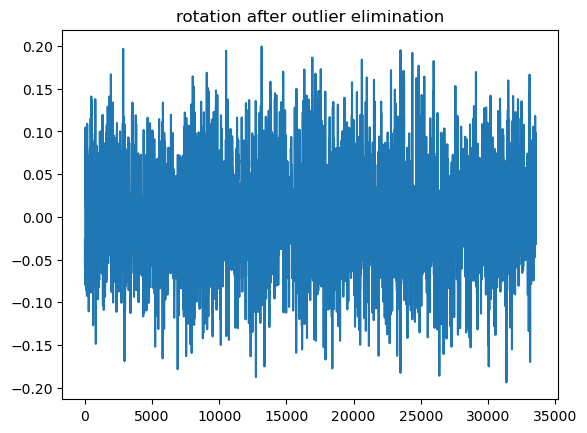

In [34]:
plt.title('rotation after outlier elimination')
plt.plot(label_[:,1])

(array([   23.,   127.,   644.,  4759., 13003., 10406.,  3912.,   561.,
           99.,    26.]),
 array([-0.19379791, -0.15447739, -0.11515687, -0.07583636, -0.03651584,
         0.00280468,  0.04212519,  0.08144571,  0.12076623,  0.16008674,
         0.19940726]),
 <BarContainer object of 10 artists>)

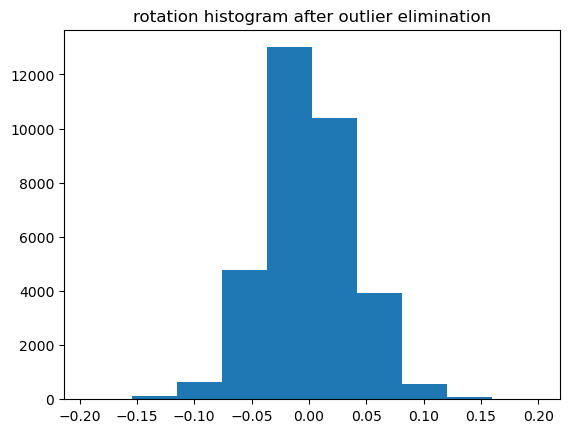

In [35]:
plt.title('rotation histogram after outlier elimination')
plt.hist(label_[:,1])

## Kutulanma İşlemi

In [36]:
binDataset = binDataset_
label = label_

In [37]:
binDataset.shape, label.shape

((33560, 2, 3601), (33560, 2))

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(label)

label = scaler.transform(label)
scaler.data_max_, scaler.data_min_

(array([0.09993606, 0.19940726]), array([ 1.53050869e-04, -1.93797907e-01]))

In [39]:
def binOutput(label, sample_sz):
    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)

    interval = sample_sz-1

    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)
    labelBinned = np.array([[t_bin,r_bin]])
    for data in label:
        t_bin = np.zeros(sample_sz)
        r_bin = np.zeros(sample_sz)
        t_bin[int(((data[0]*interval)))] = 1
        r_bin[int(((data[1]*interval)))] = 1
        
        labelBinned = np.concatenate([labelBinned, np.array([np.array([t_bin, r_bin])])], axis=0)
    return labelBinned[1:]

In [40]:
labelBinned = binOutput(label, 21)

In [41]:
labelBinned.shape, label.shape

((33560, 2, 21), (33560, 2))

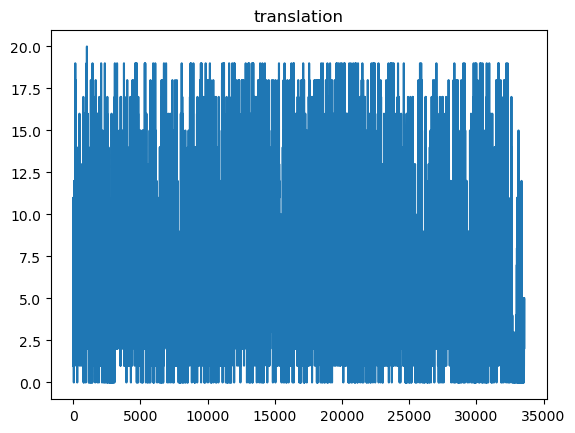

In [42]:
np.where(labelBinned[:,0] > 0)[1]
plt.title('translation')
plt.plot(np.where(labelBinned[:,0] > 0)[1])

# Eğitim için gerekli kütüphanelerin getirilmesi ve verilerin tensor matrisi olarak oluşturulması

In [44]:
import tensorflow as tf

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU

In [46]:
np.random.seed(16)
tf.random.set_seed(16)

In [47]:
binDataset[:len(binDataset)].shape, label[:len(binDataset)].shape

((33560, 2, 3601), (33560, 2))

In [48]:
binDataset = binDataset[:len(binDataset)]
label = label[:len(binDataset)]
labelBinned = labelBinned[:len(binDataset)]

In [49]:
binDataset=binDataset.reshape((int(len(binDataset)/distributed_time),distributed_time,2,3601,1))
labelBinned = labelBinned.reshape((int(len(labelBinned)/distributed_time),distributed_time,2,21))
# label = label.reshape((110,10,2))

In [50]:
int(len(binDataset))

6712

In [51]:
binDataset.shape, labelBinned.shape

((6712, 5, 2, 3601, 1), (6712, 5, 2, 21))

In [52]:
translation = labelBinned[:,:,0,:]
rotation = labelBinned[:,:,1,:]

In [53]:
translation.shape, rotation.shape

((6712, 5, 21), (6712, 5, 21))

In [54]:
#binDataset, translation, rotation

In [55]:
# train_data, val_data, test_data
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [56]:
# with tf.device('/device:GPU:0'):
dataset = tf.data.Dataset.from_tensor_slices((binDataset, {"translation": translation, "rotation" : rotation} ))
# tf.compat.v1.disable_eager_execution()
# data = (binDataset,label)
# a = tf.compat.v1.placeholder(tf.float32,shape=binDataset.shape)
# dataset = tf.data.Dataset.from_tensor_slices(a)
# dataset = dataset.prefetch(buffer_size=1000)
# dataset = dataset.batch(128)
# iterator = tf.compat.v1.data.make_initializable_iterator(dataset)
# next_batch = iterator.get_next()
# with tf.compat.v1.Session() as sess:
#     sess.run(iterator.initializer, feed_dict={a: binDataset})

In [57]:
DATASET_SIZE = len(dataset)
DATASET_SIZE

6712

In [58]:
train_size = int(0.85 * DATASET_SIZE)
val_size = int(0.05 * DATASET_SIZE)
test_size = int(0.1 * DATASET_SIZE)
#.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
full_dataset = dataset.shuffle(buffer_size=100).prefetch(buffer_size=tf.data.AUTOTUNE)

train_data = full_dataset.take(train_size).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = full_dataset.skip(train_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = test_data.skip(test_size).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.take(test_size).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [59]:
# train_data, val_data, test_data

In [60]:
# train_one_sample=train_data.take(1)
# train_one_sample

In [61]:
# for datum, label in train_one_sample:
#   print(f"""
#   bin shape: {datum.shape}
#   bin dtype: {datum.dtype}
#   bin data : {datum}
#   translation : {np.where(label['translation'] > 0)[1]}
#   rotation : {np.where(label['rotation'] > 0)[1]}
#         """)

# Temel CNN Ağının Üretilmesi

Bu ağ üzerinde önceden eğitim yapılıp ağırlıklandırılmış olacak sonrasında zamana göre dağıtılmış veriler ile eğitilecek

In [62]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model = Sequential([
  Conv1D(filters=32, 
          kernel_size=3, # can also be (3, 3)
          strides=1,
          activation="relu",
          padding="same",
          input_shape=(2, 3601, 1), name="Conv1"), # first layer specifies input shape (height, width, colour channels)
  Conv1D(32, 3, 2,  padding="same",activation="relu", name="Conv2"),
    
  AveragePooling2D(pool_size=(1,3),
                                     strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool"),
  Conv1D(64, 3, 1,  padding="same",activation="relu", name="Conv3"),
  Conv1D(64, 3, 2,  padding="same",activation="relu", name="Conv4"),
  
  AveragePooling2D(pool_size=(1,3),
                                     strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool2"),
  
  Conv1D(128, 3, 1,  padding="same",activation="relu", name="Conv5"),
  Conv1D(128, 3, 2,  padding="same",activation="relu", name="Conv6"),

  AveragePooling2D(pool_size=(1,3),strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool3"),
  
  Conv1D(256, 3, 1,  padding="same",activation="relu", name="Conv7"),
  Conv1D(256, 3, 2,  padding="same",activation="relu", name="Conv8"),

  AveragePooling2D(pool_size=(1,3),strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool4"),
  
    Flatten(),
  ])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv1D)              (None, 2, 3601, 32)       128       
                                                                 
 Conv2 (Conv1D)              (None, 2, 1801, 32)       3104      
                                                                 
 AvgPool (AveragePooling2D)  (None, 2, 600, 32)        0         
                                                                 
 Conv3 (Conv1D)              (None, 2, 600, 64)        6208      
                                                                 
 Conv4 (Conv1D)              (None, 2, 300, 64)        12352     
                                                                 
 AvgPool2 (AveragePooling2D)  (None, 2, 100, 64)       0         
                                                                 
 Conv5 (Conv1D)              (None, 2, 100, 128)       2

# Temel CNN modelinin yüklenmesi 

In [64]:
# load json and create model
json_file = open('kfold_cnn_model_gazebo.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("kfold_cnn_model_gazebo.h5")
print("Loaded model from disk")

FileNotFoundError: [Errno 2] No such file or directory: 'kfold_cnn_model_gazebo.json'

In [ ]:
loaded_model.summary()

# Ana CNN Ağının Zamana Göre Arıtılmış Üretilmesi

In [ ]:
input_layer = tf.keras.layers.Input(shape=(None,2,3601,1), ragged=True)
cnn_model = model
# for layer in model.layers:
#     layer._inbound_nodes = []
#     cnn_model = layer(cnn_model)

In [ ]:
cnn_model = TimeDistributed(cnn_model)(input_layer)

In [ ]:
cnn_model = LSTM(1024,return_sequences=True)(cnn_model)

In [ ]:
cnn_model = LSTM(1024, return_sequences=True)(cnn_model)

In [ ]:
model1 = TimeDistributed(Dense(512, activation='relu'))(cnn_model)
model2 = TimeDistributed(Dense(512, activation='relu'))(cnn_model)

model1 = TimeDistributed(Dropout(0.2) )(model1)
model2 = TimeDistributed(Dropout(0.2) )(model2)


model1 = TimeDistributed(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3)))(model1)
model2 = TimeDistributed(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3)))(model2)

model1 = TimeDistributed(Dropout(0.2)) (model1)
model2 = TimeDistributed(Dropout(0.2)) (model2)

# model1 = TimeDistributed(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3)))(model1)
# model2 = TimeDistributed(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3)))(model2)

# model1 = TimeDistributed(Dropout(0.2)) (model1)
# model2 = TimeDistributed(Dropout(0.2)) (model2)

model1 = TimeDistributed(Dense(21,activation='softmax'), name="translation")(model1) # translate
model2 = TimeDistributed(Dense(21,activation='softmax'), name="rotation")(model2) # yaw

# model1 = tf.keras.layers.Activation('softmax', name="translation")(model1)
# model2 = tf.keras.layers.Activation('softmax', name="rotation")(model2)

pre_model = tf.keras.Model(inputs=[input_layer], outputs=[model1, model2])
# losses = {
# 	"translation": CustomAccuracyTranslation(),
# 	"rotation": CustomAccuracyRotation(),
# }
# # losses = {"translation" : "mse", "rotation" : "mse"}
# loss_weights = {'translation' : 1, 'rotation' : 150}
# pre_model.compile(optimizer='adam',  loss=losses,loss_weights=loss_weights, metrics={"translation": ["mse"], "rotation": ["mse"]})
# pre_model.compile(loss = 'binary_crossentropy',
#               optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9),
#               metrics = ['accuracy'])

In [ ]:
pre_model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [ ]:
pre_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 2, 36  0           []                               
                                01, 1)]                                                           
                                                                                                  
 time_distributed (TimeDistribu  (None, None, 1024)  391200      ['input_1[0][0]']                
 ted)                                                                                             
                                                                                                  
 lstm (LSTM)                    (None, None, 1024)   8392704     ['time_distributed[0][0]']       
                                                                                              

In [ ]:
# !conda install graphviz -y
# !conda install pydot -y
# !conda install pydotplus -y

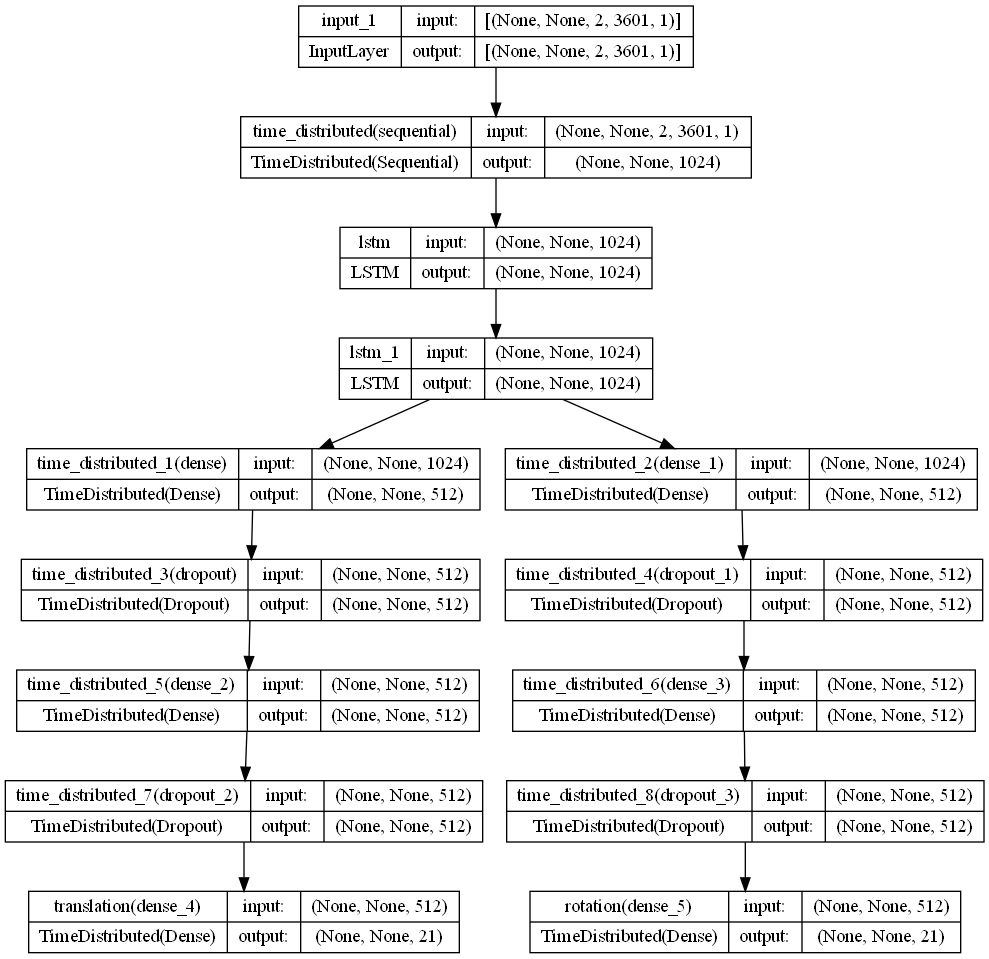

In [ ]:
tf.keras.utils.plot_model(pre_model, show_shapes=True)

In [ ]:
# train_data, val_data, test_data
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Önceden Eğitilmiş CNN ağının eklenmesi

In [ ]:
seq = loaded_model.layers[1]
# model = seq
pre_model.layers[1].set_weights(loaded_model.layers[1].get_weights())

In [ ]:
loaded_model.layers, pre_model.layers

([<keras.engine.input_layer.InputLayer at 0x25939b347c0>,
  <keras.layers.rnn.time_distributed.TimeDistributed at 0x256f0961430>])

In [ ]:
# pre_model.layers[-8].set_weights(loaded_model.layers[-8].get_weights())
[pre_model.layers[i].set_weights(loaded_model.layers[i].get_weights()) for i in list(map(lambda x : -x, list(range(1,11))))]

[None, None, None, None, None, None, None, None, None, None]

In [ ]:
pre_model.fit(train_data, validation_data=val_data, verbose=1, epochs=10)

Epoch 1/10
118/118 [==============================] - 11s 95ms/step - loss: 0.7956 - translation_loss: 0.3848 - rotation_loss: 0.3721 - translation_accuracy: 0.8875 - rotation_accuracy: 0.8810 - val_loss: 1.2909 - val_translation_loss: 0.8084 - val_rotation_loss: 0.4422 - val_translation_accuracy: 0.8099 - val_rotation_accuracy: 0.8568
Epoch 2/10
118/118 [==============================] - 11s 94ms/step - loss: 0.3500 - translation_loss: 0.1508 - rotation_loss: 0.1597 - translation_accuracy: 0.9580 - rotation_accuracy: 0.9486 - val_loss: 0.9512 - val_translation_loss: 0.4941 - val_rotation_loss: 0.4190 - val_translation_accuracy: 0.8829 - val_rotation_accuracy: 0.8712
Epoch 3/10
118/118 [==============================] - 11s 93ms/step - loss: 0.2292 - translation_loss: 0.0924 - rotation_loss: 0.0993 - translation_accuracy: 0.9735 - rotation_accuracy: 0.9680 - val_loss: 1.2752 - val_translation_loss: 0.7200 - val_rotation_loss: 0.5187 - val_translation_accuracy: 0.8378 - val_rotation_acc

In [ ]:
scores = pre_model.evaluate(test_data, verbose=0)
print(f'Score of no fold train of cnn integrated time distributed model: translation accuracy of {scores[-2]}; rotation accuracy of {scores[-1]}')

Score of no fold train of cnn integrated time distributed model: translation accuracy of 0.8677200675010681; rotation accuracy of 0.9083521366119385


In [ ]:
scores

[1.0830678939819336,
 0.5859020352363586,
 0.47330865263938904,
 0.8677200675010681,
 0.9083521366119385]

## Save Time Distributed neural network

In [ ]:
# serialize model to JSON
pre_model_json = pre_model.to_json()
with open("time_distributed.json", "w") as json_file:
    json_file.write(pre_model_json)
# serialize weights to HDF5
pre_model.save_weights("time_distributed.h5")
print("Saved model to disk")

Saved model to disk


# Load Time Distributed neural network

## K fold olarak time distributed verinin eğitilmesi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

binDataset_train, binDataset_test, label_train_t, label_test_t , label_train_r ,label_test_r = train_test_split(binDataset, labelBinned[:,0,:], labelBinned[:,1,:], test_size=0.33)

KeyboardInterrupt: 

In [ ]:
from keras import backend as K
import keras

def reset_weights(model):
    for layer in model.layers: 
        if isinstance(layer, tf.keras.Model):
            reset_weights(layer)
            continue
        for k, initializer in layer.__dict__.items():
            if "initializer" not in k:
                continue
            # find the corresponding variable
            var = getattr(layer, k.replace("_initializer", ""))
            var.assign(initializer(var.shape, var.dtype))

In [ ]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

verbosity = 1
no_epochs = 30
batch_size = 32

In [ ]:
reset_weights(pre_model)
keras.backend.clear_session()

In [ ]:
seq = loaded_model.layers[1]
# model = seq
pre_model.layers[1].set_weights(loaded_model.layers[1].get_weights())

In [ ]:

for train, test in kfold.split(binDataset_train, label_train_t):
    train_data_ = binDataset_train[train]
    train_label_t = label_train_t[train]
    train_label_r = label_train_r[train]
    


    dataset_ = tf.data.Dataset.from_tensor_slices((train_data_, {"translation": train_label_t, "rotation" : train_label_r}))
    full_dataset_ = dataset_.shuffle(buffer_size=100).batch(batch_size=batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

    history=pre_model.fit(full_dataset_,
              epochs=no_epochs,
              verbose=verbosity)
    

    test_data_ = binDataset_train[test]
    test_label_t = label_train_t[test]
    test_label_r = label_train_r[test]
    

    test_label_data = {"translation": test_label_t, "rotation" : test_label_r}

    # Generate generalization metrics
    scores = pre_model.evaluate(test_data_, test_label_data, verbose=0)
    print(f'Score for fold {fold_no}: {pre_model.metrics_names[-2]} of {scores[-2]}; {pre_model.metrics_names[-1]} of {scores[-1]}')
    
    fold_no = fold_no + 1

    

# Zamana bağlı modelin Test Verisinin tahmini

In [ ]:
pre_model.output

[<KerasTensor: type_spec=RaggedTensorSpec(TensorShape([None, None, 21]), tf.float32, 1, tf.int64) (created by layer 'translation')>,
 <KerasTensor: type_spec=RaggedTensorSpec(TensorShape([None, None, 21]), tf.float32, 1, tf.int64) (created by layer 'rotation')>]

In [ ]:
predictions = pre_model.predict(test_data)

14/14 [==============================] - 1s 53ms/step


# Örnek Batch verisi kontrolü

In [ ]:
train_batch = train_data.as_numpy_iterator()

In [ ]:
example_trained_data = train_batch.next()

In [ ]:
example_trained_data[0].shape # input

(32, 5, 2, 3601, 1)

In [ ]:
example_trained_data[1]['translation'].shape, example_trained_data[1]['rotation'].shape

((32, 5, 21), (32, 5, 21))

In [ ]:
example_bin_input_time_distributed = example_trained_data[0][0]
example_bin_input_time_distributed.shape
example_bin_output_time_distributed_translation = example_trained_data[1]['translation'][0]
example_bin_output_time_distributed_rotation = example_trained_data[1]['rotation'][0]

In [ ]:
def plotAngleBin(ax,angleBin):
    ax.cla()
    ax.scatter(0,0)
    xList = []
    yList = []
    for angle, bin in enumerate(angleBin):
        if bin > 0:
            y=bin*np.sin(np.deg2rad(angle*0.1))
            x=bin*np.cos(np.deg2rad(angle*0.1))
            xList.append(x)
            yList.append(y)
            # ax.scatter(x,y)
    ax.scatter(xList,yList)
    plt.pause(0.00000000000001)
    plt.show()

In [ ]:
%matplotlib qt
# %matplotlib inline
fig, axs = plt.subplots(2)
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

for i in range(len(example_bin_input_time_distributed)):
    fig.suptitle("Zaman Serisinde Verilen iki resim")
    text = fig.text(0.1, 0.1,"translation:{translation} rotation:{rotation} ".format(translation=np.argmax(example_bin_output_time_distributed_translation[i]), rotation=np.argmax(example_bin_output_time_distributed_rotation[i])))
    plotAngleBin(axs[0], example_bin_input_time_distributed[i][0])
    
    plotAngleBin(axs[1], example_bin_input_time_distributed[i][1])
    text.remove()
    # print(example_bin_input_time_distributed[i][0] == example_bin_input_time_distributed[i][1])


# Modelden elde edilen çıktıların doğruluk kontrolü

In [ ]:
X_test = list(map(lambda x: x[0], test_data))
y_test = list (map(lambda x: x[1], test_data))

In [ ]:
X_test[6].shape, y_test[6]['translation'].shape, predictions[0].shape

(TensorShape([32, 5, 2, 3601, 1]), TensorShape([32, 5, 21]), (443, 5, 21))

In [ ]:
y_gt = [np.concatenate([i['translation'] for i in y_test]), np.concatenate([i['rotation'] for i in y_test])]

In [ ]:
predictions[0].shape, y_gt[0].shape, predictions[1].shape, y_gt[1].shape

((443, 5, 21), (443, 5, 21), (443, 5, 21), (443, 5, 21))

In [ ]:
np.einsum('ijk->ikj', predictions[0]).shape

(443, 21, 5)

In [ ]:
np.argmax(np.einsum('ijk->ikj', predictions[0]), axis=1)

array([[6, 6, 6, 6, 5],
       [2, 2, 2, 2, 1],
       [6, 6, 6, 6, 6],
       ...,
       [5, 5, 5, 5, 5],
       [6, 5, 5, 5, 5],
       [6, 6, 6, 6, 6]], dtype=int64)

Translation tahmin ve ground truth çizilmesi

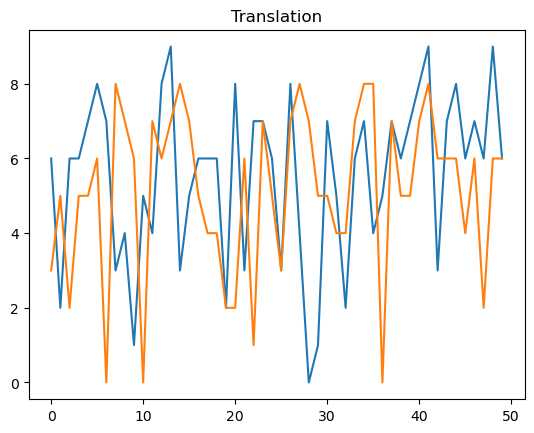

In [ ]:
%matplotlib inline
plt.title("Translation")
plt.plot(np.argmax(np.einsum('ijk->ikj', predictions[0]), axis=1)[:,0][0:50], label="Tahmin")
plt.plot(np.argmax(np.einsum('ijk->ikj', y_gt[0]), axis=1)[:,0][0:50], label="Ground Truth")


In [ ]:
%matplotlib qt
fig, axs = plt.subplots(distributed_time)
# axs[0].set_aspect('equal', adjustable='box')

start_idx = 0
for i in range(100, len(y_gt[0]), 100):
    # axs = list(map(lambda x: x.cla(), axs))

    for j in range(distributed_time):
        axs[j].cla()
        axs[j].set_title("With Prediction And GT")
        axs[j].plot(np.argmax(np.einsum('ijk->ikj', y_gt[0][start_idx:i]), axis=1)[:,j], label="GT")
        axs[j].plot(np.argmax(np.einsum('ijk->ikj', predictions[0][start_idx:i]), axis=1)[:,j], label="Tahmin")

    start_idx = i
    plt.legend()
    plt.pause(1)
    plt.show()

Rotasyon tahmin ve ground truth çizilmesi

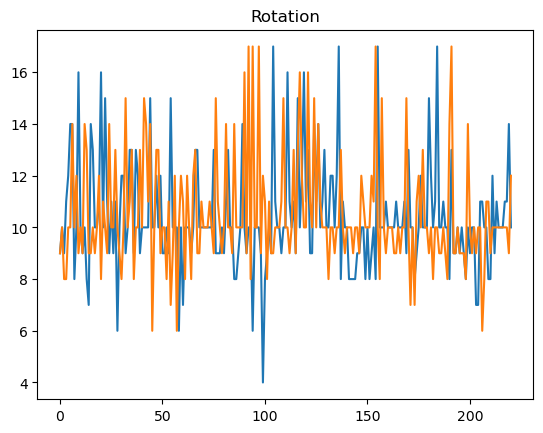

In [ ]:
%matplotlib inline
plt.title("Rotation")
plt.plot(np.argmax(np.einsum('ijk->ikj', predictions[1]), axis=1)[:,0], label="Tahmin")
plt.plot(np.argmax(np.einsum('ijk->ikj', y_gt[1]), axis=1)[:,0], label="Ground Truth")


In [ ]:
%matplotlib qt
fig, axs = plt.subplots(distributed_time)
# axs[0].set_aspect('equal', adjustable='box')

start_idx = 0
for i in range(100, len(y_gt[0]), 100):
    # axs = list(map(lambda x: x.cla(), axs))

    for j in range(distributed_time):
        axs[j].cla()
        axs[j].set_title("With Prediction And GT")
        axs[j].plot(np.argmax(np.einsum('ijk->ikj', y_gt[0][start_idx:i]), axis=1)[:,j], label="GT")
        axs[j].plot(np.argmax(np.einsum('ijk->ikj', predictions[0][start_idx:i]), axis=1)[:,j], label="Tahmin")

    start_idx = i
    plt.legend()
    plt.pause(0.0000000001)
    break
    plt.show()

## Odometrinin Artımlı Çizilmesi

In [ ]:
??

ValueError: Unknown projection '2d'

#  K-Fold CNN training

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pykitti
import math 
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import tensorflow as tf
def readBinDataset(filename):
    binDataset = np.load(filename, allow_pickle=True)
    #print(bin)

    return binDataset

In [65]:
binDataset_.shape, label_.shape

((33560, 2, 3601), (33560, 2))

In [66]:
from sklearn.model_selection import KFold
num_folds = 5

In [67]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

verbosity = 1
no_epochs = 30
batch_size = 32

In [68]:
from keras import backend as K
import keras

def reset_weights(model):
    for layer in model.layers: 
        if isinstance(layer, tf.keras.Model):
            reset_weights(layer)
            continue
        for k, initializer in layer.__dict__.items():
            if "initializer" not in k:
                continue
            # find the corresponding variable
            var = getattr(layer, k.replace("_initializer", ""))
            var.assign(initializer(var.shape, var.dtype))

In [69]:
reset_weights(model)
keras.backend.clear_session()

C:\Users\filiz\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [70]:
fold_no = 1

In [71]:
acc_per_fold = []

In [72]:
loss_per_fold = []

In [73]:
def plotAngleBin(ax,angleBin):
    
    ax.scatter(0,0)
    xList = []
    yList = []
    for angle, bin in enumerate(angleBin):
        if bin > 0:
            y=bin*np.sin(np.deg2rad(angle*0.1))
            x=bin*np.cos(np.deg2rad(angle*0.1))
            xList.append(x)
            yList.append(y)
            # ax.scatter(x,y)
    ax.scatter(xList,yList)
    plt.pause(0.00000000000001)
    plt.show()

# K-Fold Eğitim için gerekli kütüphanelerin getirilmesi

In [74]:
import tensorflow as tf

In [75]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from keras.layers import TimeDistributed
from keras.layers import LSTM
np.random.seed(16)
tf.random.set_seed(16)

In [76]:
input_layer = tf.keras.layers.Input(shape=(2,3601,1))

In [77]:
# model_ = Dense(1024, activation='relu')(model(input_layer))
# model2 = Dense(1024, activation='relu')(model(input_layer))



model1 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model(input_layer))
model2 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model(input_layer))

model1 = Dropout(0.2) (model1)
model2 = Dropout(0.2) (model2)

model1 = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model1)
model2 = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model2)

model1 = tf.keras.layers.Dropout(0.2) (model1)
model2 = tf.keras.layers.Dropout(0.2) (model2)

model1 = Dense(21, name="translation",activation='softmax')(model1) # translate
model2 = Dense(21, name="rotation",activation='softmax')(model2) # yaw

# model1 = tf.keras.layers.Activation('softmax', name="translation")(model1)
# model2 = tf.keras.layers.Activation('softmax', name="rotation")(model2)

kfold_cnn_model = tf.keras.Model(inputs=[input_layer], outputs=[model1, model2])

kfold_cnn_model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

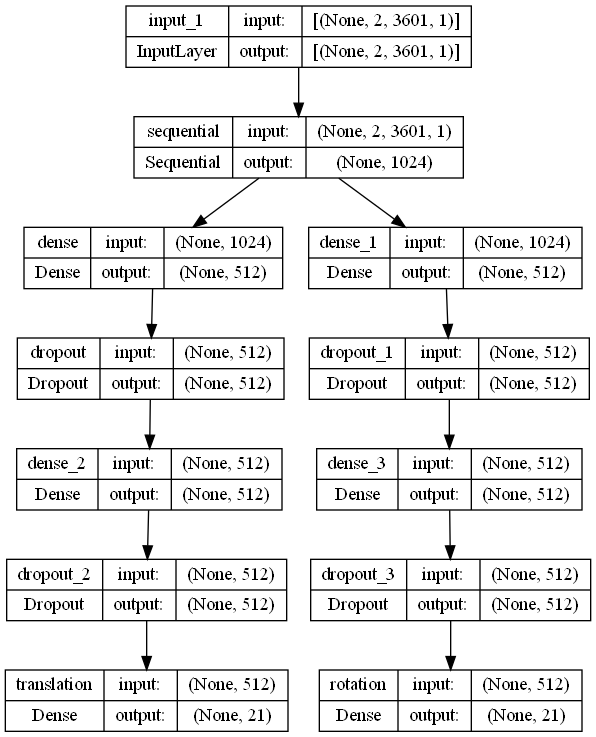

In [78]:
tf.keras.utils.plot_model(kfold_cnn_model, show_shapes=True)

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(label_)

label_ = scaler.transform(label_)
scaler.data_max_, scaler.data_min_

(array([0.09993606, 0.19940726]), array([ 1.53050869e-04, -1.93797907e-01]))

In [80]:
def binOutput(label, sample_sz):
    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)

    interval = sample_sz-1

    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)
    labelBinned = np.array([[t_bin,r_bin]])
    for data in label:
        t_bin = np.zeros(sample_sz)
        r_bin = np.zeros(sample_sz)
        t_bin[int(((data[0]*interval)))] = 1
        r_bin[int(((data[1]*interval)))] = 1
        
        labelBinned = np.concatenate([labelBinned, np.array([np.array([t_bin, r_bin])])], axis=0)
    return labelBinned[1:]

In [81]:
labelBinned_ = binOutput(label_,21)

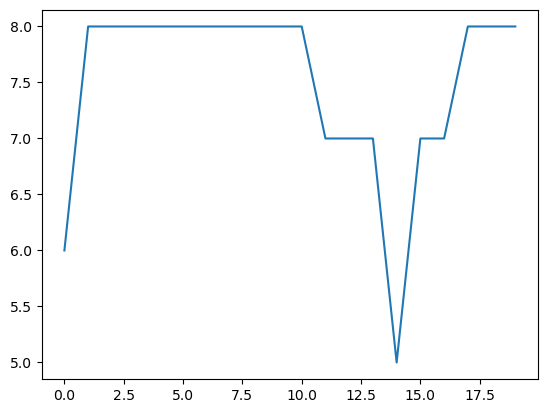

In [92]:
plt.plot(np.argmax(labelBinned_[:,1],axis=1)[:20])

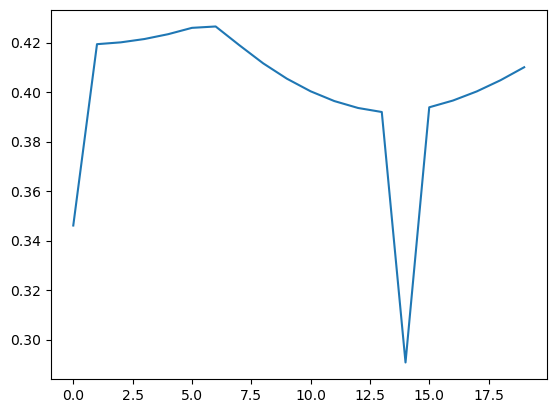

In [93]:
plt.plot(label_[:,1][:20])

In [89]:
binDataset_.shape, label_.shape, labelBinned_.shape

((33560, 2, 3601), (33560, 2), (33560, 2, 21))

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


binDataset_train, binDataset_test, label_train_t, label_test_t , label_train_r ,label_test_r = train_test_split(binDataset_, labelBinned_[:,0,:], labelBinned_[:,1,:], test_size=0.33)

In [91]:
reset_weights(kfold_cnn_model)
keras.backend.clear_session()
for train, test in kfold.split(binDataset_train, label_train_t):
    train_data_ = binDataset_train[train]
    train_label_t = label_train_t[train]
    train_label_r = label_train_r[train]
    


    dataset_ = tf.data.Dataset.from_tensor_slices((train_data_, {"translation": train_label_t, "rotation" : train_label_r}))
    full_dataset_ = dataset_.shuffle(buffer_size=100).batch(batch_size=batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    history=kfold_cnn_model.fit(full_dataset_,
              epochs=no_epochs,
              verbose=verbosity)
    

    test_data_ = binDataset_train[test]
    test_label_t = label_train_t[test]
    test_label_r = label_train_r[test]
    

    test_label_data = {"translation": test_label_t, "rotation" : test_label_r}

    # Generate generalization metrics
    scores = kfold_cnn_model.evaluate(test_data_, test_label_data, verbose=0)
    print(f'Score for fold {fold_no}: {kfold_cnn_model.metrics_names[-2]} of {scores[-2]}; {kfold_cnn_model.metrics_names[-1]} of {scores[-1]}')
   
    
    test_label_data = {"translation": label_test_t, "rotation" : label_test_r}

    # Generate generalization metrics
    scores = kfold_cnn_model.evaluate(binDataset_test, test_label_data, verbose=0)
    print(f'Score for fold {fold_no} Test data: translation acc of {scores[-2]}; rotation acc of {scores[-1]}')

    acc_per_fold.append(scores[-2])
    loss_per_fold.append(scores[-1])

    fold_no = fold_no + 1
    

C:\Users\filiz\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/30
563/563 [==============================] - 210s 37ms/step - loss: nan - translation_loss: nan - rotation_loss: nan - translation_accuracy: 0.0276 - rotation_accuracy: 1.1119e-04
Epoch 2/30
563/563 [==============================] - 12s 22ms/step - loss: nan - translation_loss: nan - rotation_loss: nan - translation_accuracy: 0.0275 - rotation_accuracy: 1.1119e-04
Epoch 3/30
563/563 [==============================] - 12s 22ms/step - loss: nan - translation_loss: nan - rotation_loss: nan - translation_accuracy: 0.0275 - rotation_accuracy: 1.1119e-04
Epoch 4/30
563/563 [==============================] - 12s 22ms/step - loss: nan - translation_loss: nan - rotation_loss: nan - translation_accuracy: 0.0275 - rotation_accuracy: 1.1119e-04
Epoch 5/30
563/563 [==============================] - 12s 22ms/step - loss: nan - translation_loss: nan - rotation_loss: nan - translation_accuracy: 0.0275 - rotation_accuracy: 1.1119e-04
Epoch 6/30
563/563 [==============================] - 12s 2

KeyboardInterrupt: 

# Save Pretrained CNN Model

In [ ]:
# serialize model to JSON
model_json = kfold_cnn_model.to_json()
with open("kfold_cnn_model_gazebo.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
kfold_cnn_model.save_weights("kfold_cnn_model_gazebo.h5")
print("Saved model to disk")

# Load PreTrained CNN Model

In [ ]:
# load json and create model
json_file = open('kfold_cnn_model_gazebo.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("kfold_cnn_model_gazebo.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [ ]:
binDataset_test.shape ,label_test_t.shape , label_test_r.shape

((7313, 2, 3601, 1), (7313, 21), (7313, 21))

In [ ]:
test_label_data = {"translation": label_test_t, "rotation" : label_test_r}

# Generate generalization metrics
scores = loaded_model.evaluate(binDataset_test, test_label_data, verbose=0)
scores

[2.4295122623443604,
 1.186394214630127,
 1.046265959739685,
 0.7760153412818909,
 0.8084233403205872]

In [ ]:
kfold_cnn_model = loaded_model

In [ ]:
def plotAngleBin(ax,angleBin):
    ax.cla()
    ax.scatter(0,0)
    xList = []
    yList = []
    for angle, bin in enumerate(angleBin):
        if bin > 0:
            y=bin*np.sin(np.deg2rad(angle*0.1))
            x=bin*np.cos(np.deg2rad(angle*0.1))
            xList.append(x)
            yList.append(y)
            # ax.scatter(x,y)
    ax.scatter(xList,yList)
    plt.pause(1)
    plt.show()

In [ ]:
train_batch = full_dataset_.as_numpy_iterator()
example_trained_data = train_batch.next()
example_trained_data[0].shape # input
print(example_trained_data[1]['translation'].shape, example_trained_data[1]['rotation'].shape)
example_bin_input = example_trained_data[0]
example_bin_output_translation= example_trained_data[1]['translation']
example_bin_output_rotation = example_trained_data[1]['rotation']


%matplotlib qt
# %matplotlib inline
fig, axs = plt.subplots(2)
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

for i in range(len(example_trained_data[0])):
    fig.suptitle("Batch verisi")
    text = fig.text(0.1, 0.1,"translation:{translation} rotation:{rotation} ".format(translation=np.argmax(example_bin_output_translation[i]), rotation=np.argmax(example_bin_output_rotation[i])))
    plotAngleBin(axs[0], example_bin_input[i][0])
    
    plotAngleBin(axs[1], example_bin_input[i][1])
    text.remove()
    
    # print(example_bin_input_time_distributed[i][0] == example_bin_input_time_distributed[i][1])


(32, 21) (32, 21)


# Tek tek değerlendir

In [ ]:
test_data_ = binDataset_test
test_label_t = label_test_t
test_label_r = label_test_r


test_label_data = {"translation": test_label_t, "rotation" : test_label_r}

# Generate generalization metrics
scores = kfold_cnn_model.evaluate(test_data_, test_label_data, verbose=0)
print(f'Score for fold {fold_no}: {kfold_cnn_model.metrics_names[-2]} of {scores[-2]}; {kfold_cnn_model.metrics_names[-1]} of {scores[-1]}')


Score for fold 1: translation_accuracy of 0.7760153412818909; rotation_accuracy of 0.8084233403205872


In [ ]:
X_test = list(map(lambda x: x[0], test_data_))
y_test = list(map(lambda x: x[1], test_label_data['translation'])) 

In [ ]:
predictions = kfold_cnn_model.predict(test_data_)

229/229 [==============================] - 4s 13ms/step


In [ ]:
predictions[0].shape, test_label_data['translation'].shape

((7313, 21), (7313, 21))

translation tahmin ve ground truth cizdirilmesi

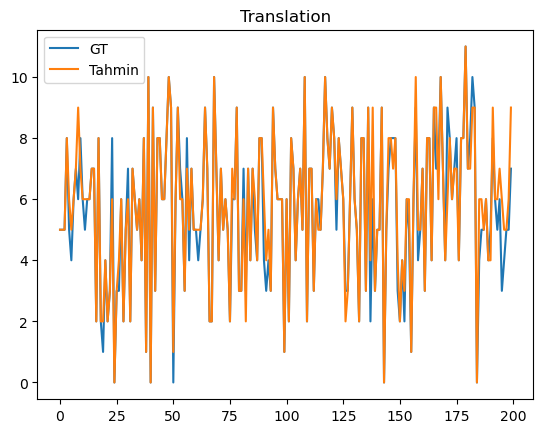

In [ ]:
%matplotlib inline
plt.autoscale()
plt.plot(np.argmax(test_label_data['translation'][0:200], axis=1), label="GT")
plt.plot(np.argmax(predictions[0][0:200], axis=1),label="Tahmin")

plt.title("Translation")
plt.legend()
plt.pause(0.0000000001)
plt.show()

In [ ]:
%matplotlib qt
fig, axs = plt.subplots(2)
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

start_idx = 0
for i in range(100,len(test_label_data['translation']),100):
    axs[0].cla()
    axs[1].cla()

    axs[0].set_title("Translation")
    axs[0].plot(np.argmax(predictions[0][start_idx:i], axis=1),label="GT")

    axs[1].set_title("With Prediction And GT")
    axs[1].plot(np.argmax(test_label_data['translation'][start_idx:i], axis=1), label="GT")
    axs[1].plot(np.argmax(predictions[0][start_idx:i], axis=1),label="Tahmin")

    start_idx = i
    plt.legend()
    plt.pause(0.0000000001)
    plt.show()

rotasyon tahmin ve ground truth cizdirilmesi

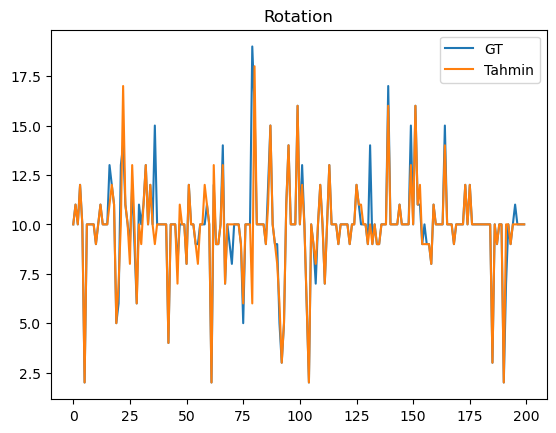

In [ ]:
%matplotlib inline
plt.autoscale()
plt.plot(np.argmax(test_label_data['rotation'][0:200], axis=1), label="GT")
plt.plot(np.argmax(predictions[1][0:200], axis=1),label="Tahmin")

plt.title("Rotation")
plt.legend()
plt.pause(0.0000000001)
plt.show()

In [ ]:
%matplotlib qt
fig, axs = plt.subplots(2)
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

start_idx = 0
for i in range(100,len(test_label_data['rotation']),100):
    axs[0].cla()
    axs[1].cla()

    axs[0].set_title("Translation GT")
    axs[0].plot(np.argmax(predictions[1][start_idx:i], axis=1),label="GT")

    axs[1].set_title("With Prediction And GT")
    axs[1].plot(np.argmax(test_label_data['rotation'][start_idx:i], axis=1), label="GT")
    axs[1].plot(np.argmax(predictions[1][start_idx:i], axis=1),label="Tahmin")

    start_idx = i
    plt.legend()
    plt.pause(0.0000000001)
    plt.show()

## Temel CNN Ağı Odometry Artımlı Çizim

In [ ]:
np.argmax(predictions[1][start_idx:i], axis=1)

array([], dtype=int64)

Ground truth artımlı çizim

In [ ]:
prediction_odometry = scaler.inverse_transform(np.array([np.argmax(predictions[0], axis=1), np.argmax(predictions[1], axis=1)]).transpose())

In [ ]:
gt_odometry = scaler.inverse_transform(np.array([np.argmax(test_label_data['translation'], axis=1), np.argmax(test_label_data['rotation'], axis=1)]).transpose())

In [ ]:
prediction_odometry

array([[13.96688042,  1.51992337],
       [13.96688042,  1.68024357],
       [13.96688042,  1.51992337],
       ...,
       [24.91632756,  1.51992337],
       [22.17896577,  1.84056377],
       [16.70424221,  0.71832237]])

In [ ]:
np.cos(1.51)

0.0607588812193859

In [ ]:
%matplotlib qt
x=np.array([0])
y=np.array([0])
z=np.array([0])
yaw=np.array([0])
fig = plt.figure("test")
ax = fig.add_subplot(projection='3d')
ax.set_title("test")
for i in range(len(prediction_odometry)):
    trans_diff=prediction_odometry[i][0]
    yaw_diff = prediction_odometry[i][1]
    x=np.append(x, [x[-1] + trans_diff*np.cos(yaw_diff)])
    y=np.append(y, [y[-1] + trans_diff*np.sin(yaw_diff)])
    z=np.append(z, [0])

gt_x=np.array([0])
gt_y=np.array([0])
gt_z=np.array([0])
gt_yaw=np.array([0])
# fig = plt.figure("test")
# ax = fig.add_subplot(projection='3d')
# ax.set_title("test")
for i in range(len(gt_odometry)):
    trans_diff=gt_odometry[i][0]
    yaw_diff = prediction_odometry[i][1]
    gt_x=np.append(gt_x, [gt_x[-1] + trans_diff*np.cos(yaw_diff)])
    gt_y=np.append(gt_y, [gt_y[-1] + trans_diff*np.sin(yaw_diff)])
    gt_z=np.append(gt_z, [0])


ax.scatter(gt_x, gt_y, gt_z, marker='o')

ax.scatter(x, y, z, marker='o')
